# This notebook is based on Kaggle competition for Titanic Disaster prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\CSV files\\titanic dataset\\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','Ticket'],axis=1 , inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.isna().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

<AxesSubplot:>

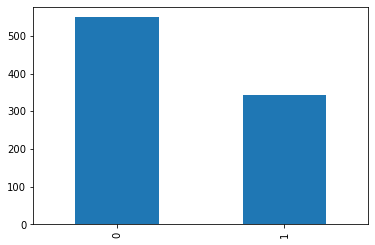

In [12]:
df.Survived.value_counts().plot(kind='bar')

<AxesSubplot:>

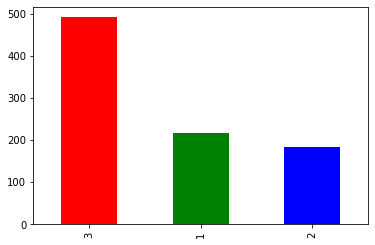

In [17]:
df.Pclass.value_counts().plot(kind='bar',color=['red','green','blue'])

In [38]:
df.Sex.nunique()

2

Text(0.5, 1.0, 'Number of male vs female')

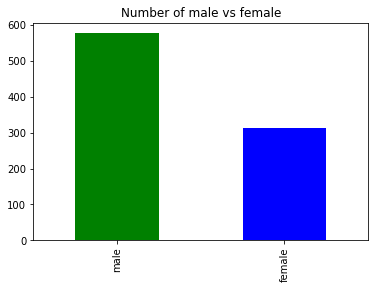

In [42]:
df.Sex.value_counts().plot(kind='bar' , color=['Green','blue'])
plt.title('Number of male vs female')


D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


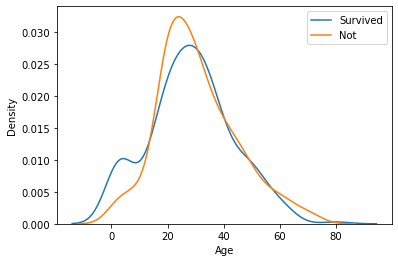

In [57]:
fig , ax = plt.subplots()

sns.distplot(df[df['Survived'] == 1]['Age'] , hist = False)

sns.distplot(df[df['Survived'] == 0]['Age'] , hist = False)

plt.legend(['Survived' , 'Not'])

D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


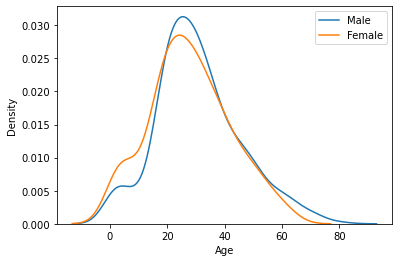

In [63]:
sns.distplot(df[df['Sex'] == 'male']['Age'] , hist=False)

sns.distplot(df[df['Sex'] == 'female']['Age'] , hist=False)

plt.legend(['Male',"Female"])

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

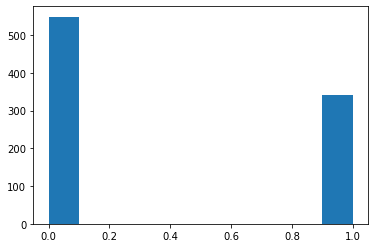

In [50]:
plt.hist(df['Survived'],)

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Handling missing data

In [95]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [96]:
df.isna().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

#### As Cabin column has more than 77% data missing. We will drop this column

In [98]:
df.drop(['Cabin'], axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


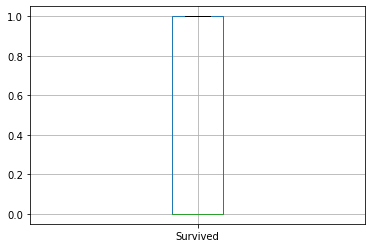

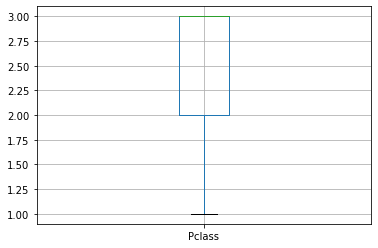

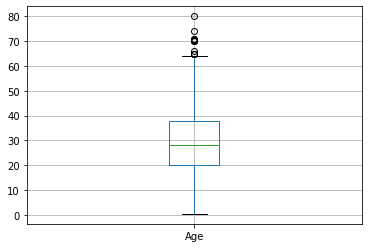

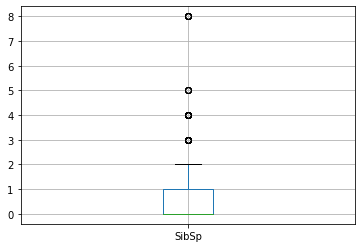

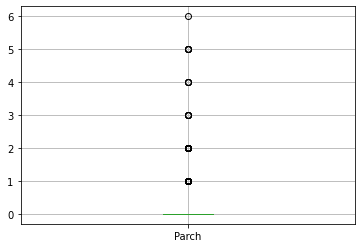

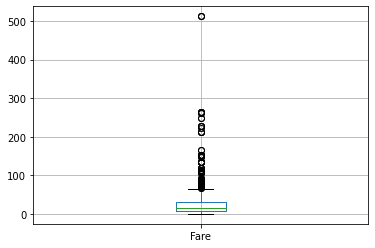

In [106]:
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure()
        df.boxplot([col])

D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

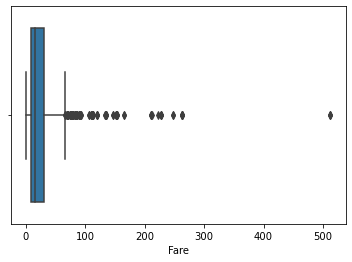

In [107]:
sns.boxplot(df['Fare'])

D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

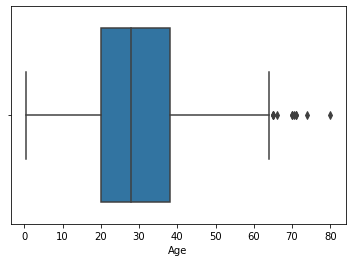

In [108]:
sns.boxplot(df['Age'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [109]:
# finding categorical column
categorical_col = [col for col in df.columns
                   if df[col].dtypes == 'object']

In [112]:
numerical_col = set(df.columns) - set(categorical_col)

In [113]:
numerical_col

{'Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived'}

In [114]:
categorical_col

['Sex', 'Embarked']

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [164]:
x = df.drop(["Survived"] , axis=1)
y = df.Survived

x_train , x_test , v_train , v_test = train_test_split(x,y,test_size=0.2)

In [165]:
x_train.shape , x_test.shape , v_train.shape , v_test.shape

((712, 7), (179, 7), (712,), (179,))

In [166]:
x_train.isna().sum()

Pclass        0
Sex           0
Age         144
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [167]:
x_test.isna().sum()

Pclass       0
Sex          0
Age         33
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [168]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
774,2,female,54.0,1,3,23.0000,S
280,3,male,65.0,0,0,7.7500,Q
241,3,female,NaN,1,0,15.5000,Q
33,2,male,66.0,0,0,10.5000,S
103,3,male,33.0,0,0,8.6542,S


In [218]:
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

### Converting categorical values into numerical values

In [169]:
categorical_cols = [col for col in x_train.columns
                   if x_train[col].dtype == 'object']

In [170]:
categorical_cols

['Sex', 'Embarked']

In [172]:
numerical_cols = set(x_train.columns)- set(categorical_cols)

In [173]:
numerical_cols

{'Age', 'Fare', 'Parch', 'Pclass', 'SibSp'}

#### Using one hot encoder to transforrm categorical column into numerical column

In [219]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore' , sparse=False)

x_train_copy = pd.DataFrame(ohe.fit_transform(x_train_copy[categorical_cols]))
x_test_copy = pd.DataFrame(ohe.transform(x_test_copy[categorical_cols]))

In [220]:
x_train_copy.index = x_train.index
x_test_copy.index = x_test.index

In [221]:
x_train_copy.columns= ['female','male','C','Q','S','un']
x_test_copy.columns= ['female','male','C','Q','S','un']
x_train_copy.head(), x_test_copy.head()


(     female  male    C    Q    S   un
 774     1.0   0.0  0.0  0.0  1.0  0.0
 280     0.0   1.0  0.0  1.0  0.0  0.0
 241     1.0   0.0  0.0  1.0  0.0  0.0
 33      0.0   1.0  0.0  0.0  1.0  0.0
 103     0.0   1.0  0.0  0.0  1.0  0.0,
      female  male    C    Q    S   un
 691     1.0   0.0  1.0  0.0  0.0  0.0
 23      0.0   1.0  0.0  0.0  1.0  0.0
 565     0.0   1.0  0.0  0.0  1.0  0.0
 755     0.0   1.0  0.0  0.0  1.0  0.0
 724     0.0   1.0  0.0  0.0  1.0  0.0)

In [222]:
x_train_copy.drop(['un'],axis=1 , inplace=True)
x_test_copy.drop(['un'],axis=1 , inplace=True)

In [192]:
x_train_copy.head()

,female,male,C,Q,S
774,1.0,0.0,0.0,0.0,1.0
280,0.0,1.0,0.0,1.0,0.0
241,1.0,0.0,0.0,1.0,0.0
33,0.0,1.0,0.0,0.0,1.0
103,0.0,1.0,0.0,0.0,1.0


In [223]:
x_test_copy.head()

,female,male,C,Q,S
691,1.0,0.0,1.0,0.0,0.0
23,0.0,1.0,0.0,0.0,1.0
565,0.0,1.0,0.0,0.0,1.0
755,0.0,1.0,0.0,0.0,1.0
724,0.0,1.0,0.0,0.0,1.0


In [224]:
x_train_numerical = x_train.copy()
x_test_numerical = x_test.copy()

In [226]:
x_train_numerical.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
774,2,female,54.0,1,3,23.0000,S
280,3,male,65.0,0,0,7.7500,Q
241,3,female,NaN,1,0,15.5000,Q
33,2,male,66.0,0,0,10.5000,S
103,3,male,33.0,0,0,8.6542,S


In [227]:
x_train_numerical = x_train_numerical.drop(['Sex','Embarked'],axis=1)
x_test_numerical = x_test_numerical.drop(['Sex','Embarked'],axis=1)

In [228]:
x_train_numerical = pd.merge(x_train_numerical , x_train_copy, left_index=True, right_index=True)
x_test_numerical = pd.merge(x_test_numerical , x_test_copy, left_index=True, right_index=True)

In [229]:
x_train_numerical.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
774,2,54.0,1,3,23.0000,1.0,0.0,0.0,0.0,1.0
280,3,65.0,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
241,3,NaN,1,0,15.5000,1.0,0.0,0.0,1.0,0.0
33,2,66.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
103,3,33.0,0,0,8.6542,0.0,1.0,0.0,0.0,1.0


In [230]:
x_test_numerical.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
691,3,4.00,0,1,13.4167,1.0,0.0,1.0,0.0,0.0
23,1,28.00,0,0,35.5000,0.0,1.0,0.0,0.0,1.0
565,3,24.00,2,0,24.1500,0.0,1.0,0.0,0.0,1.0
755,2,0.67,1,1,14.5000,0.0,1.0,0.0,0.0,1.0
724,1,27.00,1,0,53.1000,0.0,1.0,0.0,0.0,1.0


In [231]:
x_train_numerical.isna().sum()

Pclass      0
Age       144
SibSp       0
Parch       0
Fare        0
female      0
male        0
C           0
Q           0
S           0
dtype: int64

In [232]:
x_test_numerical.isna().sum()

Pclass     0
Age       33
SibSp      0
Parch      0
Fare       0
female     0
male       0
C          0
Q          0
S          0
dtype: int64

### Filling missing values

<AxesSubplot:ylabel='Density'>

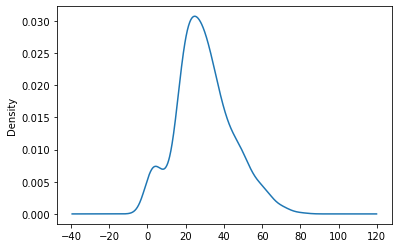

In [233]:
df.Age.plot(kind= 'kde')

In [235]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(add_indicator=True , strategy = 'median')

In [241]:
x_train_trf = pd.DataFrame(imputer.fit_transform(x_train_numerical))
x_test_trf = pd.DataFrame(imputer.transform(x_test_numerical))

### Modelling 

In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [250]:
model = {"Logistic regression":LogisticRegression(),
         "Random forest classifier":RandomForestClassifier()}

In [255]:
def fit_and_score(model , x_train , x_test , y_train , y_test):
    model_score = {}
    
    for name, model in model.items():
        model.fit(x_train , y_train)
        
        model_score[name] = model.score(x_test, y_test)
        
    return model_score
    

In [256]:
fit_and_score(model , x_train_trf , x_test_trf , v_train , v_test)

D:\Anaconda\in\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.7653631284916201,
 'Random forest classifier': 0.7932960893854749}

### Using Random Forest Classifier

In [258]:
clf = RandomForestClassifier()

clf.fit(x_train_trf, v_train)

clf.score(x_test_trf , v_test)

0.7932960893854749

### Hyper parameter tuining 

In [259]:
grid = {"n_estimators": np.arange(50,500,50) ,
        "max_features": ['auto', 'sqrt', 'log2', 0.5,1], 
        "min_samples_leaf": np.arange(1,20,2),
        "min_samples_split": np.arange(2,20,2),
        "oob_score": [True , False],
        "bootstrap": [True , False],
        "max_depth": np.arange(0,300,50)
       }

In [264]:
model = RandomizedSearchCV(RandomForestClassifier() , grid , n_iter = 50 , verbose=True , cv=10 ,n_jobs= -1)

model.fit(x_train_trf , v_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


D:\Anaconda\in\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\in\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\in\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "D:\Anaconda\in\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda\in\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_bat

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([  0,  50, 100, 150, 200, 250]),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         0.5, 1],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'oob_score': [True, False]},
                   verbose=True)

In [265]:
model.score(x_test_trf  , v_test)

0.8212290502793296

In [266]:
model.best_params_

{'oob_score': False,
 'n_estimators': 250,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 250,
 'bootstrap': True}

In [273]:
grid = {"n_estimators": np.arange(220,300,10) ,
        "max_features": [ 'sqrt', 'log2'], 
        "min_samples_leaf": np.arange(1,5,1),
        "min_samples_split": np.arange(10,20,2),
        "oob_score": [False],
        "bootstrap": [True],
        "max_depth": np.arange(220,300,10)}

In [274]:
model = GridSearchCV(RandomForestClassifier(),grid , cv=10, n_jobs=-1 , verbose=True)
model.fit(x_train_trf , v_train)

Fitting 10 folds for each of 2560 candidates, totalling 25600 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': array([220, 230, 240, 250, 260, 270, 280, 290]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([10, 12, 14, 16, 18]),
                         'n_estimators': array([220, 230, 240, 250, 260, 270, 280, 290]),
                         'oob_score': [False]},
             verbose=True)

In [276]:
model.best_params_

{'bootstrap': True,
 'max_depth': 230,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 240,
 'oob_score': False}

In [279]:
model.score(x_test_trf , v_test)

0.8156424581005587

In [284]:
clf = RandomForestClassifier(bootstrap= True, max_depth= 250, max_features='log2', min_samples_leaf= 1, 
                             min_samples_split= 16 ,n_estimators=250, oob_score= False)

In [285]:
clf.fit(x_train_trf , v_train)

RandomForestClassifier(max_depth=250, max_features='log2', min_samples_split=16,
                       n_estimators=250)

In [286]:
clf.score(x_test_trf , v_test)

0.8268156424581006

In [307]:
test= pd.read_csv("D:\\CSV files\\titanic dataset\\test.csv")

In [290]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [291]:
test.drop(['PassengerId',"Name",'Ticket','Cabin'],axis=1 , inplace=True)

In [295]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [296]:
test_copy = test.copy()

In [297]:
test_copy = pd.DataFrame(ohe.transform(test_copy[categorical_cols]))

In [298]:
test_copy.index = test.index

In [299]:
test_copy.columns= ['female','male','C','Q','S','un']

In [300]:
test_copy.drop(['un'],axis=1 , inplace=True)

In [301]:
test_numerical = test.copy()

In [302]:
test_numerical = test_numerical.drop(['Sex','Embarked'],axis=1)

In [303]:
test_numerical = pd.merge(test_numerical , test_copy, left_index=True, right_index=True)

In [304]:
test_trf = pd.DataFrame(imputer.transform(test_numerical))

In [306]:
preds = clf.predict(test_trf)
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [309]:
submit = pd.DataFrame({"PassengerId" : test.PassengerId , 
                       "Survived" : preds} )

In [311]:
submit.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [313]:
submit.to_csv("D:\\CSV files\\titanic dataset\\submission.csv", index = False)